<a href="https://colab.research.google.com/github/syedanida/pycaret-low_code_tasks/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [19]:
!pip install pycaret==2.3.5
!pip install pycaret[full]

  Using cached pycaret-2.3.5-py3-none-any.whl.metadata (11 kB)
  Using cached scipy-1.5.4.tar.gz (25.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [20]:
from pycaret.regression import*
import pandas as pd

In [21]:
# Load the dataset
data = pd.read_csv('housing.csv')

In [22]:
# Inspect the dataset
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [24]:
# Set up PyCaret for regression
clf = setup(data, target='median_house_value', use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,334
1,Target,median_house_value
2,Target type,Regression
3,Original data shape,"(20640, 10)"
4,Transformed data shape,"(20640, 14)"
5,Transformed train set shape,"(14447, 14)"
6,Transformed test set shape,"(6193, 14)"
7,Numeric features,8
8,Categorical features,1
9,Rows with missing values,1.0%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [25]:
# Compare models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,31955.9249,2252669729.5958,47453.3529,0.8306,0.2354,0.1797,0.2400
rf,Random Forest Regressor,32092.4526,2401860879.6578,48994.2579,0.8194,0.2385,0.1796,8.5820
catboost,CatBoost Regressor,33380.6136,2424118830.0325,49224.9682,0.8178,0.2440,0.1874,10.9750
et,Extra Trees Regressor,34947.5580,2728576809.3760,52217.9021,0.7950,0.2507,0.1945,3.4750
gbr,Gradient Boosting Regressor,38291.0322,3017283188.7968,54910.2379,0.7732,0.2705,0.2165,3.0070
dt,Decision Tree Regressor,43637.0876,4700588968.4582,68533.5618,0.6465,0.3244,0.2378,0.2230
llar,Lasso Least Angle Regression,49858.1864,4727544334.1864,68708.4289,0.6452,0.3785,0.2884,0.0970
lr,Linear Regression,49858.3553,4727534875.6179,68708.2854,0.6452,0.3785,0.2884,0.1200
ridge,Ridge Regression,49855.1520,4727135695.5463,68705.7941,0.6452,0.3785,0.2884,0.1120
lasso,Lasso Regression,49858.2088,4727543710.8533,68708.4236,0.6452,0.3785,0.2884,0.5440


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [26]:
# Tune the best model
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,35428.4780,2511015087.7909,50110.0298,0.8097,0.2658,0.2027
1,34163.1529,2458086380.4621,49579.0922,0.8226,0.2643,0.1945
2,35505.1040,2627458170.6939,51258.7375,0.8099,0.2693,0.1984
3,35111.9862,2465978669.4597,49658.6213,0.7995,0.2908,0.2129
4,34183.8402,2381263132.4466,48798.1878,0.8102,0.2843,0.2123
5,34889.6881,2488838065.1194,49888.2558,0.8210,0.2618,0.1988
6,35607.4553,2525195162.2613,50251.3200,0.8137,0.2717,0.2018
7,36025.5725,2637611875.8254,51357.6857,0.8073,0.3048,0.2104
8,33899.8359,2216815265.4658,47083.0677,0.8326,0.2667,0.2025


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


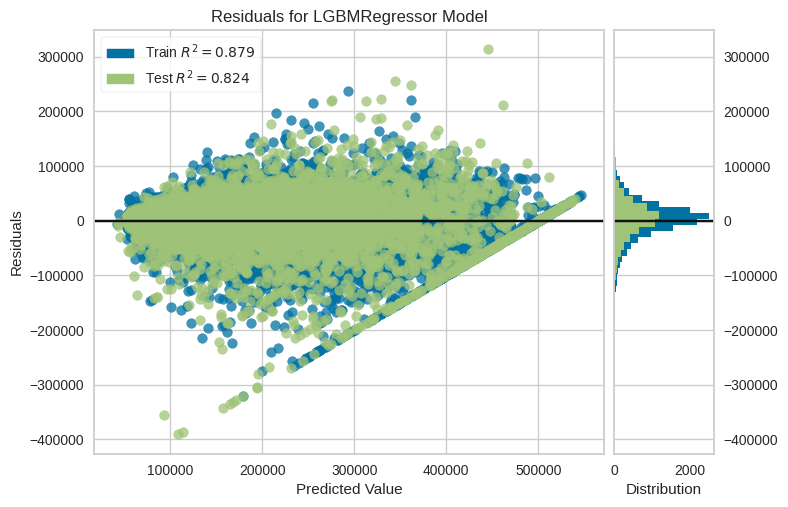

In [27]:
# Evaluate the tuned model
plot_model(tuned_model)

In [29]:
# Save the model
save_model(tuned_model, 'median_house_value')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['longitude', 'latitude',
                                              'housing_median_age',
                                              'total_rooms', 'total_bedrooms',
                                              'population', 'households',
                                              'median_income'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy...
                  LGBMRegres